In [984]:
import pandas as pd
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [985]:
# Read in dataset covering proposals for American Rescue Plan Funding for Louisville, Kentucky and provided by
# the Louisville Metro Open Data Portal
df = pd.read_excel('ARP_Comment_Form_Redacted_FULL_0_(1).xlsx')

# Display column names
df.columns

Index(['Entry Id', 'Name', 'Last', 'Full Email', 'Phone Number', 'Zip Code',
       'Organization',
       'Support public health expenditures\n By funding COVID-19 mitigation efforts, medical expenses, behavioral healthcare, and certain public health and safety staff. \n\nAddress negative economic impacts caused by the public health emergency\nIncluding economic harms to workers, households, small businesses, impacted industries, and the public sector.\n\nReplace lost public sector revenue\nUsing this funding to provide government services to the extent of the reduction in revenue experienced due to the pandemic.\n\nProvide premium pay for essential workers\nOffering additional support to those who have borne and will bear the greatest health risks because of their service in critical infrastructure sectors.\n\nInvest in water, sewer, and broadband infrastructure\nMaking necessary investments to improve access to clean drinking water, support vital wastewater and storm water infrastru

In [986]:
# Replace column names with more human parseable values
df.columns = ['Entry Id', 'Name', 'Last', 'Full Email', 'Phone Number', 'Zip Code',
       'Organization',
       'Social Benefit',
       'Comments:', 'Date Created', 'Created By', 'Last Updated', 'Updated By',
       'IP Address', 'Last Page Accessed', 'Completion Status']

In [987]:
# Sanity check
df.columns

Index(['Entry Id', 'Name', 'Last', 'Full Email', 'Phone Number', 'Zip Code',
       'Organization', 'Social Benefit', 'Comments:', 'Date Created',
       'Created By', 'Last Updated', 'Updated By', 'IP Address',
       'Last Page Accessed', 'Completion Status'],
      dtype='object')

In [988]:
# Display a Datafram Row to assess 'the lay of the land.'
df.head(1)

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created,Created By,Last Updated,Updated By,IP Address,Last Page Accessed,Completion Status
0,14,Marty,Merkel,mmerkel@jrarchitects.com,5025834697,40206,NaN,Address negative economic impacts caused by th...,"Fund LRDA, Louisville Downtown Residents Assoc...",2021-06-10 22:14:00,public,NaN,NaN,[IP ADDRESS REDACTED],1,1


In [989]:
# Find number of rows and columns in the dataset
df.shape

(1337, 16)

In [990]:
# Find count of non-null values and datatype of each DataFrame column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Entry Id            1337 non-null   int64         
 1   Name                1337 non-null   object        
 2   Last                1337 non-null   object        
 3   Full Email          1337 non-null   object        
 4   Phone Number        1232 non-null   object        
 5   Zip Code            1336 non-null   object        
 6   Organization        775 non-null    object        
 7   Social Benefit      1235 non-null   object        
 8   Comments:           794 non-null    object        
 9   Date Created        1337 non-null   datetime64[ns]
 10  Created By          1337 non-null   object        
 11  Last Updated        0 non-null      float64       
 12  Updated By          0 non-null      float64       
 13  IP Address          1337 non-null   object      

In [991]:
# Find the count of NULL values in each DataFrame column
df.isna().sum()

Entry Id                 0
Name                     0
Last                     0
Full Email               0
Phone Number           105
Zip Code                 1
Organization           562
Social Benefit         102
Comments:              543
Date Created             0
Created By               0
Last Updated          1337
Updated By            1337
IP Address               0
Last Page Accessed       0
Completion Status        0
dtype: int64

In [992]:
# Drop any columns that contain no valid values aka 1337 NULLs
df.drop(['Last Updated', 'Updated By'], axis=1, inplace=True)

In [993]:
# Find the count of NULL values in each DataFrame column (Sanity check)
df.isna().sum()

Entry Id                0
Name                    0
Last                    0
Full Email              0
Phone Number          105
Zip Code                1
Organization          562
Social Benefit        102
Comments:             543
Date Created            0
Created By              0
IP Address              0
Last Page Accessed      0
Completion Status       0
dtype: int64

In [994]:
# Find the first three NULL values in the Phone Number column
df[df['Phone Number'].isna() == True].head(3)

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created,Created By,IP Address,Last Page Accessed,Completion Status
38,135,Erin,Fulkerson,efulkerson@sevencounties.org,NaN,40207,Seven Counties Services/ Bellewood & Brooklawn,Address negative economic impacts caused by th...,Please consider the following for Seven Counti...,2021-07-02 08:37:00,public,[IP ADDRESS REDACTED],1,1
43,142,Caitlin,Osterhoudt,costerhoudt@sevencounties.org,NaN,40203,NaN,Address negative economic impacts caused by th...,NaN,2021-07-02 09:10:00,public,[IP ADDRESS REDACTED],1,1
45,144,Zahjona,Henry,zhenry@sevencoutnies.org,NaN,42101,Seven Counties Services: Bellewood,Address negative economic impacts caused by th...,I honestly think each category should get some...,2021-07-02 09:17:00,public,[IP ADDRESS REDACTED],1,1


In [995]:
df.fillna({'Phone Number':'5028675309'}, inplace=True)

In [996]:
df.isna().sum()

Entry Id                0
Name                    0
Last                    0
Full Email              0
Phone Number            0
Zip Code                1
Organization          562
Social Benefit        102
Comments:             543
Date Created            0
Created By              0
IP Address              0
Last Page Accessed      0
Completion Status       0
dtype: int64

In [997]:
# Create a function to handle the rest of the columns that contain NULL values
def fill_nulls(column, value):
    return df.fillna({column: value}, inplace=True)

In [998]:
# Create a list of the columns which contain the NULL values
null_names = df.columns[df.isnull().any()].tolist()

# Display the list
null_names

['Zip Code', 'Organization', 'Social Benefit', 'Comments:']

In [999]:
# Create a list to contain the values to fill the NULLs
null_values = ['Unknown Zip', 'Anonymous Organization', 'Unidentified Benefit', 'No additional commentary' ]

In [1000]:
# Zip our column/value pairings into a Dictionary
null_dict = dict(zip(null_names, null_values))

# Display our dictionary
null_dict

{'Zip Code': 'Unknown Zip',
 'Organization': 'Anonymous Organization',
 'Social Benefit': 'Unidentified Benefit',
 'Comments:': 'No additional commentary'}

In [1001]:
# Run our function inside of a for loop passing the column and replacement value for each item
for key, value in null_dict.items():
    fill_nulls(key, value)

In [1002]:
# Sanity check 
df.isna().sum()

Entry Id              0
Name                  0
Last                  0
Full Email            0
Phone Number          0
Zip Code              0
Organization          0
Social Benefit        0
Comments:             0
Date Created          0
Created By            0
IP Address            0
Last Page Accessed    0
Completion Status     0
dtype: int64

In [1003]:
# Sanity Check
df[df['Comments:'] == 'No additional commentary']

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created,Created By,IP Address,Last Page Accessed,Completion Status
6,38,[FIRST NAME REDACTED],[LAST NAME REDACTED],[EMAIL REDACTED],[PHONE REDACTED],40205,Anonymous Organization,Address negative economic impacts caused by th...,No additional commentary,2021-06-11 13:00:00,public,[IP ADDRESS REDACTED],1,1
13,67,[FIRST NAME REDACTED],[LAST NAME REDACTED],[EMAIL REDACTED],[PHONE REDACTED],40203,Anonymous Organization,Address negative economic impacts caused by th...,No additional commentary,2021-06-14 21:09:00,public,[IP ADDRESS REDACTED],1,1
14,71,[FIRST NAME REDACTED],[LAST NAME REDACTED],[EMAIL REDACTED],[PHONE REDACTED],40204,Anonymous Organization,Address negative economic impacts caused by th...,No additional commentary,2021-06-15 13:54:00,public,[IP ADDRESS REDACTED],1,1
23,103,Stephanie,Davidson,stephanie@onewest.org,5029075147,40203,OneWest,Address negative economic impacts caused by th...,No additional commentary,2021-06-23 11:54:00,public,[IP ADDRESS REDACTED],1,1
24,104,Rebecca,grau,rebecca@foodliteracyproject.org,5024190606,40207,The Food Literacy Project,Address negative economic impacts caused by th...,No additional commentary,2021-06-23 11:59:00,public,[IP ADDRESS REDACTED],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,942,Sandy,Spears,Sandy.Spears@kctcs.edu,5028675309,40205,Jefferson Community and Technical,Unidentified Benefit,No additional commentary,2021-07-19 12:12:00,public,[IP ADDRESS REDACTED],1,1
1284,955,[FIRST NAME REDACTED],[LAST NAME REDACTED],[EMAIL REDACTED],[PHONE REDACTED],40299,Anonymous Organization,Unidentified Benefit,No additional commentary,2021-07-19 14:57:00,public,[IP ADDRESS REDACTED],1,1
1295,1071,[FIRST NAME REDACTED],[LAST NAME REDACTED],[EMAIL REDACTED],[PHONE REDACTED],40202,Louisville Y.A.B.,Unidentified Benefit,No additional commentary,2021-07-22 23:00:00,public,[IP ADDRESS REDACTED],1,1
1296,1072,[FIRST NAME REDACTED],[LAST NAME REDACTED],[EMAIL REDACTED],[PHONE REDACTED],40059,Anonymous Organization,Unidentified Benefit,No additional commentary,2021-07-23 05:34:00,public,[IP ADDRESS REDACTED],1,1


In [1004]:
# Illustrate using .groupby how to get a count of values within a column
df.groupby('Name')['Entry Id'].count().sort_values(ascending=False)

Name
[FIRST NAME REDACTED]    864
Michael                   10
James                      6
Stephanie                  5
Mark                       4
                        ... 
mark                       1
laura                      1
lacey                      1
kristin                    1
kim                        1
Name: Entry Id, Length: 371, dtype: int64

In [1005]:
# Illustrate using .value_counts() how to get a count of values within a column
df['Name'].value_counts()

Name
[FIRST NAME REDACTED]    864
Michael                   10
James                      6
Stephanie                  5
Brian                      4
                        ... 
Ludmilla                   1
Brittany                   1
Kelly                      1
Zahjona                    1
Tracy                      1
Name: count, Length: 371, dtype: int64

In [1006]:
# Print the value counts for each column
for col in df.columns:
    print(df[col].value_counts())

Entry Id
1324    2
1322    2
1323    2
29      1
31      1
       ..
1172    1
1179    1
1183    1
1210    1
28      1
Name: count, Length: 1334, dtype: int64
Name
[FIRST NAME REDACTED]    864
Michael                   10
James                      6
Stephanie                  5
Brian                      4
                        ... 
Ludmilla                   1
Brittany                   1
Kelly                      1
Zahjona                    1
Tracy                      1
Name: count, Length: 371, dtype: int64
Last
[LAST NAME REDACTED]    864
Smith                     7
Miller                    5
Johnson                   5
Brown                     4
                       ... 
McCracken                 1
r                         1
Shea                      1
Burke                     1
ramser                    1
Name: count, Length: 408, dtype: int64
Full Email
[EMAIL REDACTED]                     864
charmaine.smith@louisvilleky.gov       4
timmy.risinger@louisvlleky.gov   

In [1007]:
# Isolate the known duplicated values in the entry id column which should be unique
df[df['Entry Id'].isin([1322, 1323, 1324])]

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created,Created By,IP Address,Last Page Accessed,Completion Status
196,1322,[FIRST NAME REDACTED],[LAST NAME REDACTED],[EMAIL REDACTED],[PHONE REDACTED],40217,Louisville bats baseball club,Address negative economic impacts caused by th...,The Louisville bats baseball club is a corners...,2021-08-19 22:02:00,public,[IP ADDRESS REDACTED],1,1
197,1323,Charles,Walsh,walshc22@gmail.com,5034423235,40205,The Chapel of St Philp Neri,Address negative economic impacts caused by th...,The Chapel provides a donation based venue for...,2021-08-21 13:17:00,public,[IP ADDRESS REDACTED],1,1
289,1324,Wail,Sabarneh,wsabarneh@yahoo.com,5133383412,40223,Louisville liquidation,"Invest in water, sewer, and broadband infrastr...",No additional commentary,2021-08-21 18:09:00,public,[IP ADDRESS REDACTED],1,1
1324,1322,Kevin,Burns,kevin.burns2317@outlook.com,7089124694,40217,Louisville bats baseball club,Address negative economic impacts caused by th...,The Louisville bats baseball club is a corners...,2021-08-19 22:02:00,public,[IP ADDRESS REDACTED],1,1
1325,1323,Charles,Walsh,walshc22@gmail.com,5034423235,40205,The Chapel of St Philp Neri,Address negative economic impacts caused by th...,The Chapel provides a donation based venue for...,2021-08-21 13:17:00,public,[IP ADDRESS REDACTED],1,1
1326,1324,Wail,Sabarneh,wsabarneh@yahoo.com,5133383412,40223,Louisville liquidation,"Invest in water, sewer, and broadband infrastr...",No additional commentary,2021-08-21 18:09:00,public,[IP ADDRESS REDACTED],1,1


In [1008]:
# Keep the more complete latter columns and drop the earlier
df.drop_duplicates(subset=['Entry Id'], keep='last', inplace=True)

In [1009]:
# Inspect these columns observed to have the same value in each row, to assess for it's meaningfulness
for col in ['Created By', 'IP Address', 'Last Page Accessed', 'Completion Status']:
    print(df[col].unique())

['public']
['[IP ADDRESS REDACTED]']
[1]
[1]


In [1010]:
# Drop these columns with unmeaningful redundant values
df.drop(['Created By', 'IP Address', 'Last Page Accessed', 'Completion Status'], axis=1, inplace=True)

In [1011]:
# Coerce the Date Created column to drop the times and format the dates MM-DD-YYYY
for i in df.index:
    df['Date Created'] = pd.to_datetime(df['Date Created']).dt.strftime('%m-%d-%Y')

In [1012]:
# Sanity check to assess the success of the last operation
df['Date Created'].head(3)

0    06-10-2021
1    06-10-2021
2    06-11-2021
Name: Date Created, dtype: object

In [1013]:
# Convert the Phone Number column to a string data type, was previously integers with a few strings
df['Phone Number'] = df['Phone Number'].astype(str)

In [1014]:
# Make a list of columns that contain a value with 'REDACTED' in it and save it to a variable
red_cols = ['Name', 'Last', 'Full Email', 'Phone Number']

In [1015]:
# Iterate through each index
for i in df.index:
    # Of each column known to have the value 'REDACTED'
    for col in red_cols:
        # Isolate the rows with the value 'REDACTED'
        if 'REDACTED' in df.loc[i, col]:
            # And replace 'REDACTED' with the value 'Unknown'
            df.loc[i, col] = 'Unknown'

In [1016]:
# Sanity check to assess the success of the previous operation
df.head(3)

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created
0,14,Marty,Merkel,mmerkel@jrarchitects.com,5025834697,40206,Anonymous Organization,Address negative economic impacts caused by th...,"Fund LRDA, Louisville Downtown Residents Assoc...",06-10-2021
1,15,Unknown,Unknown,Unknown,Unknown,40218,Anonymous Organization,Address negative economic impacts caused by th...,The funds should be used for negative economi...,06-10-2021
2,26,Unknown,Unknown,Unknown,Unknown,40217,Anonymous Organization,Address negative economic impacts caused by th...,Greg. Show me your checkbook and Iâ€™ll tell y...,06-11-2021


In [1017]:
# Use slicing to remove any digits beyond 5 in the Zip Code column
for i in df.index:
    df.loc[i, 'Zip Code'] = str(df.loc[i, 'Zip Code'])[:5]

In [1018]:
# Find all unique values in the Zip Code column
df['Zip Code'].unique()

array(['40206', '40218', '40217', '40205', '47130', '40204', '40216',
       '40245', '40214', '40203', '40212', '40207', '40291', '40223',
       '40299', '40213', '40222', '40272', '42101', '40220', '40219',
       '40211', '40228', '40202', '47136', '40208', '40258', '40422',
       '40215', '40175', '40243', '40241', '40160', '40209', '40059',
       '40229', '36542', '40165', '40210', '40118', '35758', '40014',
       '40242', '40404', '40047', '47170', '47129', '40162', '40051',
       '47150', '40056', '40065', '47164', '40071', '42701', '47177',
       '76135', '47124', '40067', '47141', '40108', '40004', '40036',
       '42754', '40107', '20449', '40055', '40023', '47142', '47172',
       '40164', '40031', '40514', '47421', '47112', '40342', '40024',
       '46110', '33315', '42303', '47119', '47111', '40121', '40026',
       '47126', '40517', '41018', '40509', '47117', '47131', '40109',
       '40268', 'Unkno', '207', '40037', '20220', '40221', '47122', 'A'],
      dtype=obje

In [1019]:
# Create a DataFrame with the values that have fewer than 5 characters to assess whether to keep them
df[(df['Zip Code'] == 'A') | (df['Zip Code'] == '207') | (df['Zip Code'] == 'Unkno')]

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created
1066,1,Unknown,Unknown,Unknown,Unknown,Unkno,Testers,Replace lost public sector revenue,Testing,05-14-2021
1142,227,Unknown,Unknown,Unknown,Unknown,207,Seven Counties Services,Support public health expenditures,_x000D_\nI am writing to petition a spending i...,07-02-2021
1264,483,Unknown,Unknown,Unknown,Unknown,A,Anonymous Organization,Unidentified Benefit,No additional commentary,07-12-2021


In [1020]:
# Drop the two rows deemed invalid data
df.drop([1066, 1264], inplace=True)

In [1021]:
# Coerce the Zip Code of the remaining row to match our 5 digit formatting (after checking the zip of Seven 
# Counties Services and discovering it is actually in 40204.)
df['Zip Code'] = df['Zip Code'].map({'207':'40204'}).fillna(df['Zip Code'])

In [1022]:
df.head(3)

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created
0,14,Marty,Merkel,mmerkel@jrarchitects.com,5025834697,40206,Anonymous Organization,Address negative economic impacts caused by th...,"Fund LRDA, Louisville Downtown Residents Assoc...",06-10-2021
1,15,Unknown,Unknown,Unknown,Unknown,40218,Anonymous Organization,Address negative economic impacts caused by th...,The funds should be used for negative economi...,06-10-2021
2,26,Unknown,Unknown,Unknown,Unknown,40217,Anonymous Organization,Address negative economic impacts caused by th...,Greg. Show me your checkbook and Iâ€™ll tell y...,06-11-2021


In [1023]:
# Show a current count of values present in the Organization column
df['Organization'].value_counts()

Organization
Anonymous Organization     561
CLOUT                       47
LMDC                        27
Louisville Zoo              22
Seven Counties Services     21
                          ... 
THE TAXPAYERS                1
clout                        1
Grow, LLC                    1
AMPED                        1
Louisville Y.A.B.            1
Name: count, Length: 449, dtype: int64

In [1024]:
# I had received erros indicating that there were non-string values in the column, so I applied this to correct
df['Organization'] = df['Organization'].astype(str)

In [1025]:
# Find values in the Organization column that contain > 100 characters
for i, j in df[['Entry Id', 'Organization']].iterrows():
    if len(j['Organization']) > 100:
        print(i, j['Organization'])

375 Metro government workers (Health and Wellness, Zoo, OMB, IT, Corrections, Parks, Air Pollution and Control, Animal Services, Community Resilience, Revenue, Develop Louisville, YTS)
1194 I thinl you guys needs to make sure public housing is affordable for the mental ill and give the Home provider more money that take care of the mental disability in there home food has gone  and they didn't get anymore money for food and board ..
1195 I am a social work professor and former chair of the boards of directors for the Coalition for the Homeless and Metropolitan Housing Coalition.  While this response is informed by those experiences, it represents my thoughts and opinions only.
1317  Louisville Family Justice Advocates---Retired KY prison system employee. (Probation and Parole Officer in Louisville) 


In [1026]:
# Inspect the long values we observed earlier
df[df.index.isin([375, 1194, 1195, 1317])]

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created
375,271,Unknown,Unknown,Unknown,Unknown,40059,"Metro government workers (Health and Wellness,...",Provide premium pay for essential workers,Many metro workers kept working in person thro...,07-03-2021
1194,1171,Unknown,Unknown,Unknown,Unknown,40241,I thinl you guys needs to make sure public hou...,Support public health expenditures,Mental Health is serious and the one that tak...,07-26-2021
1195,1174,Unknown,Unknown,Unknown,Unknown,47122,I am a social work professor and former chair ...,Support public health expenditures,Housing and health are inextricably related. ...,07-26-2021
1317,1229,Unknown,Unknown,Unknown,Unknown,40206,Louisville Family Justice Advocates---Retired...,Unidentified Benefit,Louisville should do all it can to help inmate...,07-27-2021


In [1027]:
# Coerce these long values into something more appropriate for categorization
df.loc[375, 'Organization'] = 'Metro Government Workers'
df.loc[1194, 'Organization'] = 'Citizen'
df.loc[1195, 'Organization'] = 'Citizen'
df.loc[1317, 'Organization'] = 'Louisville Family Justice Advocates'

In [ ]:
# Answer the Who!

# Plot the top 25 organizations by # of ARP Applications submitted
px.bar(df[df['Organization'] != 'Anonymous Organization']['Organization'].value_counts()[:25],
       text_auto=True,
       labels= {'value':'# of ARP Applications'}).update_layout(showlegend=False)

# I want to illustrate to students the phenomena of values that should be bucketed like 'department of corrections' and 'LMDC'

In [1029]:
# Print every row in the DataFrame where the Organization column contains the substring 'Fire'
df[df['Organization'].str.contains('Fire')]

,Entry Id,Name,Last,Full Email,Phone Number,Zip Code,Organization,Social Benefit,Comments:,Date Created
594,579,Unknown,Unknown,Unknown,Unknown,40228,Louisville Fire Department,Provide premium pay for essential workers,No additional commentary,07-13-2021
595,580,Unknown,Unknown,Unknown,Unknown,40214,Fire,Provide premium pay for essential workers,Please provide premium pay for essential worke...,07-13-2021
602,587,Unknown,Unknown,Unknown,Unknown,40217,Louisville Division of Fire,Provide premium pay for essential workers,No additional commentary,07-13-2021
606,592,Unknown,Unknown,Unknown,Unknown,40203,Louisville Fire dept,Provide premium pay for essential workers,No additional commentary,07-13-2021
609,595,Donald,Sorg,donald.sorg@louisvilleky.gov,5024579828,40023,Fire,Provide premium pay for essential workers,No additional commentary,07-13-2021
611,598,Unknown,Unknown,Unknown,Unknown,40228,Louisville Fire & Rescue,Provide premium pay for essential workers,No additional commentary,07-13-2021
621,607,Geoffrey,McNulty,geoffrey.mcnulty@louisvilleky.gov,5026497696,40214,Louisville Fire,Provide premium pay for essential workers,No additional commentary,07-13-2021
626,613,Tamara,Stewart,tamara.stewart@louisvilleky.gov,5027278831,40299,Louisville Division of Fire,Provide premium pay for essential workers,No additional commentary,07-13-2021
627,614,Erik,Sturgeon,erik.sturgeon@louisvilleky.gov,5026093819,40223,Louisville Fire Department,Provide premium pay for essential workers,No additional commentary,07-13-2021
631,617,Jason,Sanders,jason.sanders@louisvilleky.gov,5022964615,40214,Louisville Fire Department,Provide premium pay for essential workers,No additional commentary,07-13-2021


In [1030]:
# Coerce values in the column relevant to the fire department to a common value
# I can then refresh the bar chart and note that all these categories have moved into one bar
for i in df[(df['Organization'].str.contains('Fire')) | (df['Organization'] == 'LFD') | (df['Organization'] == 'Louisville fire')].index:
    df.loc[i, 'Organization'] = 'Louisville Fire Department'

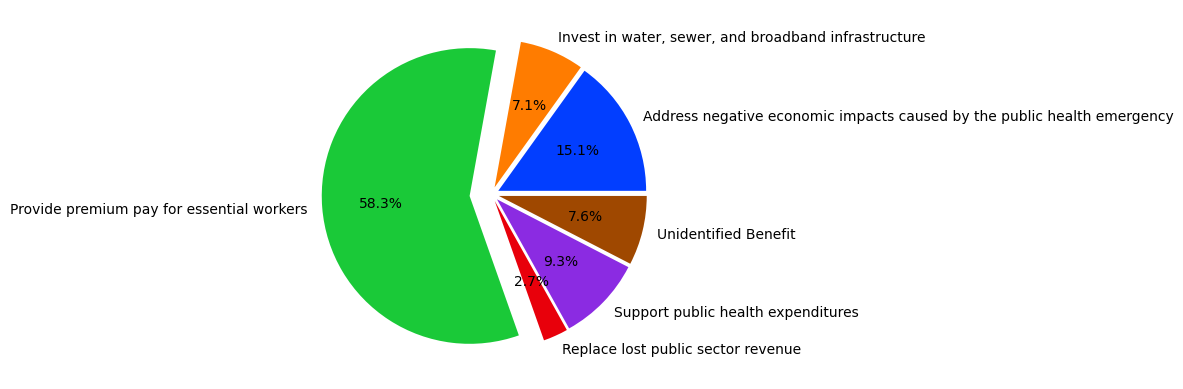

In [1064]:
# Answer the What!

# Define pie chart to show what the ARP funding is being allocated for
ax = df.groupby('Social Benefit')['Entry Id'].count().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0.05, 0.15, 0.05, 0.05, 0.05], 
                                                           colors = sns.color_palette('bright'))
ax.yaxis.set_visible(False)
colors = sns.color_palette('dark')
plt.show()

<Axes: xlabel='Date Created'>

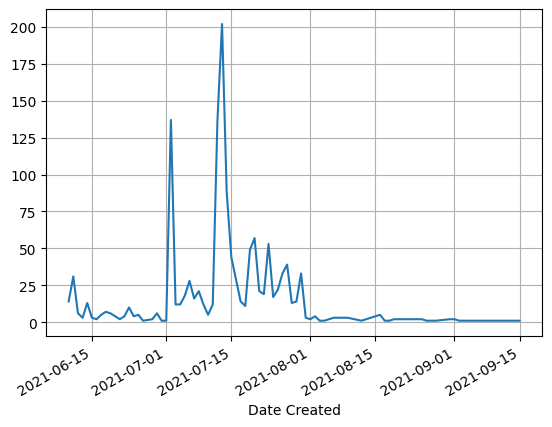

In [1065]:
# Answer the When! 

# Convert the Date Created column from a string type to a datetime
df['Date Created'] = pd.to_datetime(df['Date Created'])

# Define the Matplotlib line chart to show the frequency of when ARP applications were filed
df.groupby('Date Created')['Entry Id'].count().plot(grid=True)

In [ ]:
# Answer the Where! 

# from urllib.request import urlopen
# import json

# # Grab raw zip code to lat/lon mappings from Github and parse them to json

# with urlopen('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ky_kentucky_zip_codes_geo.min.json') as response:
#     zipcodes = json.load(response)

In [ ]:
# Create choropleth map showing the frequency of ARP applications for each zip code
# fig = px.choropleth(pd.DataFrame(df['Zip Code'].value_counts()).reset_index(),
#                   geojson=zipcodes,
#                   locations='Zip Code',
#                   color='count',
#                   color_continuous_scale='blues',
#                   featureidkey='properties.ZCTA5CE10')

# fig.update_geos(fitbounds="locations", visible=False)

# fig.update_layout(title='Frequency of Louisville ARP applications by Zip Code')

# fig.show()

In [1033]:
from wordcloud import WordCloud

In [1034]:
# Read our comments column, excluding the value we coerced the nulls to into one string
cloud = "".join(df[df['Comments:'] != 'No additional commentary']['Comments:'].astype(str))
# Remove the carriage return
cloud = cloud.replace("_x000D_", "")

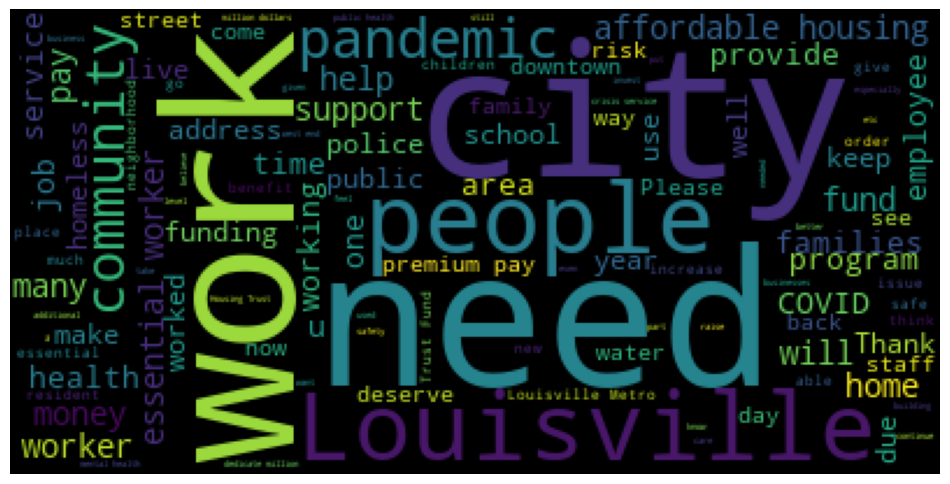

In [ ]:
# Answer the Why! 

# Create a word cloud showing the frequency of given words in the Comments: column
wordcloud = WordCloud().generate(cloud)

plt.figure(figsize=(12, 10))

plt.imshow(wordcloud)

plt.axis("off")
plt.show()

<Axes: xlabel='Date Created'>

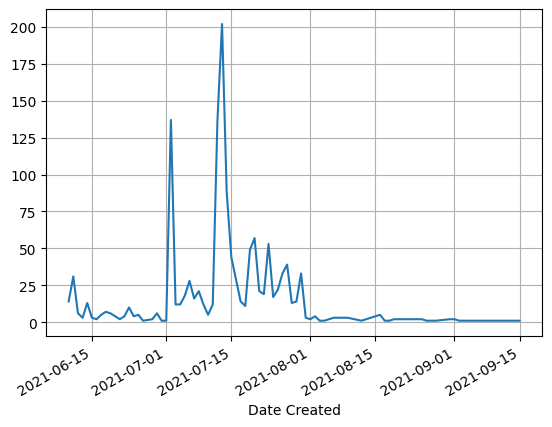

In [ ]:
df['Date Created'] = pd.to_datetime(df['Date Created'])

df.groupby('Date Created')['Entry Id'].count().plot(grid=True)